In [18]:
from sklearn.metrics import accuracy_score
import numpy as np
from src.utils.detect_outlier import *
from sklearn.model_selection import train_test_split
from src.utils.reporting import reporting
from src.utils.evaluate import *
from src.utils.labeling_from_score import labeling
from src.models.adam import Adam
from src.models.ga import GeneticAlgorithm
from src.models.mlp import MLP
from src.models.gradient_descent import GradientDescent

df_normalized = read_data("/home/bang/Desktop/works/credit-score-optimization/src/data/Lending-Data-Ethereum-Labeled.csv")
df_normalized.dropna(inplace=True)
x = np.array(
    df_normalized[
        [
            "totalAsset",
            "averageTotalAsset",
            "frequencyMountOfTransaction",
            "borrow_per_balance",
            "deposit_per_asset",
            "borrow_per_deposit",
            "totalValueOfLiquidation",
            "numberOfLiquidation",
            "frequencyOfTransaction",
            "frequencyOfDappTransactions",
            "numberOfInteractedDapps",
            "typesOfInteractedDapps",
            "numberOfReputableDapps",
            "age",
        ]
    ].values
)
first_y = df_normalized["1st_label"].values
second_y = df_normalized["2nd_label"].values

2024-09-25 10:17:55.078854: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-25 10:17:55.123598: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-25 10:17:55.349807: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-25 10:17:55.349875: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-25 10:17:55.386814: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [2]:
adam = Adam(x, first_y, second_y)
adam.run()

------START EXECUTE ADAM------
new learning weights: [ 0.28831839 -0.02522728  0.44921171 -0.00379402 -0.03266746  0.01199779
  0.15732845  0.45607558 -0.34679625 -0.14096553 -0.10478706  0.29617734
  0.01866625  0.00262995]
new learning weights: [ 0.46132776 -0.22450654  0.56366778  0.03890998 -0.00195388  0.04399143
  0.0677003   0.34283823 -0.18811583  0.27204411  0.01405099 -0.28284449
  0.15425749  0.00988673]
new learning weights: [ 0.11709992  0.15828031  0.57421334  0.19319486 -0.00278008  0.00641121
 -0.16296775  0.47812641 -0.16085926 -0.19284575  0.29745772 -0.08433475
  0.02575135 -0.00633983]
new learning weights: [ 0.34550813 -0.10334513  0.01300029  0.2016325  -0.00402974 -0.00865244
  0.38684648  0.10234993 -0.03417266  0.24559038 -0.32343072  0.10806971
  0.00450727  0.00113688]
------EXECUTE IN 51.14498782157898------


In [23]:
gd = GradientDescent(x, first_y, second_y, num_iterations= 10)
gd.run()

------START EXECUTE GD------
new learning weights: [ 2.85277811  2.38681291 -0.18084599 -0.40117354 -2.10683247 -0.12372488
  0.72809416  1.13548535 -0.94938811 -0.41917873 -0.11153883 -0.53474351
 -0.51317402 -1.07684778]
new learning weights: [ 0.84054521 -0.00301756 -0.04681888 -0.76779363 -0.88012428  1.05878661
 -0.47337938 -0.47266422 -0.26403189  0.60604308 -0.33793524 -0.38656502
  0.59622544  2.35138987]
new learning weights: [ 1.98189508  1.49866115  0.27913192 -0.80554886  0.33798151  2.30171437
 -0.46386042 -1.05770998 -0.16678474 -0.28099669  0.20271121  0.19999578
 -0.19403739 -1.22969188]
------EXECUTE IN 4.036988735198975------


In [ ]:
ga = GeneticAlgorithm(x, first_y, second_y, len(x[0]))
ga.run()

In [12]:
mlp = MLP(x, first_y, second_y)
mlp.run(epochs=10)

------START EXECUTE MLP------
Epoch 1/10
996/996 [==============================] - 2s 1ms/step - loss: 1.9746 - custom_accuracy_4: 0.9443
Epoch 2/10
996/996 [==============================] - 2s 2ms/step - loss: 1.0426 - custom_accuracy_4: 0.9583
Epoch 3/10
996/996 [==============================] - 2s 2ms/step - loss: 0.7977 - custom_accuracy_4: 0.9718
Epoch 4/10
996/996 [==============================] - 2s 2ms/step - loss: 0.6842 - custom_accuracy_4: 0.9754
Epoch 5/10
996/996 [==============================] - 2s 2ms/step - loss: 0.6022 - custom_accuracy_4: 0.9765
Epoch 6/10
996/996 [==============================] - 2s 2ms/step - loss: 0.5098 - custom_accuracy_4: 0.9766
Epoch 7/10
996/996 [==============================] - 2s 2ms/step - loss: 0.4239 - custom_accuracy_4: 0.9786
Epoch 8/10
996/996 [==============================] - 2s 2ms/step - loss: 0.3494 - custom_accuracy_4: 0.9810
Epoch 9/10
996/996 [==============================] - 2s 2ms/step - loss: 0.2906 - custom_accuracy

In [13]:
import pandas as pd
def count_samples(path_file):
    df = pd.read_csv(path_file)
    result = {
        "(0;0)":{"0":0,"1":0,"2":0, "3":0, "4":0},
        "(0;1)":{"0":0,"1":0,"2":0, "3":0, "4":0},
        "(1;1)":{"0":0,"1":0,"2":0, "3":0, "4":0},
        "(1;2)":{"0":0,"1":0,"2":0, "3":0, "4":0},
        "(2;2)":{"0":0,"1":0,"2":0, "3":0, "4":0},
        "(2;3)":{"0":0,"1":0,"2":0, "3":0, "4":0},
        "(3;3)":{"0":0,"1":0,"2":0, "3":0, "4":0},
        "(3;4)":{"0":0,"1":0,"2":0, "3":0, "4":0},
        "(4;4)":{"0":0,"1":0,"2":0, "3":0, "4":0}
    }
    for index, row in df.iterrows():
        label1 = int(row['first_y_test'])
        label2 = int(row['second_y_test'])
        label3 = int(row['predicted_labels'])
        key = f'({label1};{label2})'
        result[key][f"{label3}"] += 1
    return result

def calculate_precision_recall_f1(path_file):
    labels = ['0', '1', '2', '3', '4']
    samples = count_samples(path_file)
    result = {}
    total_true = 0
    total_items = sum([sum(list(value.values())) for key, value in samples.items()])
    for label in labels:
        tp, fp, fn, tn = 0, 0, 0, 0
        for key, value in samples.items(): 
            if label in key:
                #true positive
                tp += value[label]
                #false nagative
                fn += sum([value[i] for i in value if i!= label])
            
            if label not in key:
                #true nagative:
                tn += sum([value[i] for i in value if i!= label])
                #false positive
                fp += value[label]
        result[label] = {
            "precision": tp/(tp+fp),
            "recall": tp/(tp+fn),
            "accuracy": (tp+tn)/(tp+fn+tn+fp)
        }
        result[label]["f1"] = 2*result[label]["precision"]*result[label]["recall"]/(result[label]["precision"]+result[label]["recall"])
        total_true += tp
    result["average"] = {
        "precision": sum([value["precision"] for key, value in result.items()])/5,
        "recall": sum([value["recall"] for key, value in result.items()])/5,
        "accuracy": sum([value["accuracy"] for key, value in result.items()])/5,
        "f1": sum([value["f1"] for key, value in result.items()])/5,
    }
    result['accuracy'] = total_true/total_items
    return result
    

In [14]:
calculate_precision_recall_f1("results/ga.csv")

{'0': {'precision': 0.7735849056603774,
  'recall': 0.22905027932960895,
  'accuracy': 0.9905843952043186,
  'f1': 0.35344827586206895},
 '1': {'precision': 0.990513439294333,
  'recall': 0.9786236948121352,
  'accuracy': 0.9765237587094344,
  'f1': 0.9845326716294459},
 '2': {'precision': 0.944954128440367,
  'recall': 0.7554209183673469,
  'accuracy': 0.9431925177327224,
  'f1': 0.8396243133085238},
 '3': {'precision': 0.8862179487179487,
  'recall': 0.15055812687176695,
  'accuracy': 0.7996987006465381,
  'f1': 0.2573888759599721},
 '4': {'precision': 0.9178082191780822,
  'recall': 0.9867452135493373,
  'accuracy': 0.9956688217939865,
  'f1': 0.9510290986515259},
 'average': {'precision': 0.9026157282582215,
  'recall': 0.6200796465860391,
  'accuracy': 0.9411336388174,
  'f1': 0.6772046470823073},
 'accuracy': 0.9752055740380391}

In [15]:
calculate_precision_recall_f1("results/mlp.csv")

{'0': {'precision': 0.9411764705882353,
  'recall': 0.3575418994413408,
  'accuracy': 0.9925302868620928,
  'f1': 0.5182186234817814},
 '1': {'precision': 0.9982406166219839,
  'recall': 0.9796102935131136,
  'accuracy': 0.9831146820664114,
  'f1': 0.9888377111083447},
 '2': {'precision': 0.9478150190920662,
  'recall': 0.7123724489795918,
  'accuracy': 0.9356600338961772,
  'f1': 0.8133988712907336},
 '3': {'precision': 0.9730769230769231,
  'recall': 0.41328614211815956,
  'accuracy': 0.8620927750925867,
  'f1': 0.5801643416778138},
 '4': {'precision': 0.9,
  'recall': 0.013254786450662739,
  'accuracy': 0.9578808612139853,
  'f1': 0.026124818577648767},
 'average': {'precision': 0.9520618058758418,
  'recall': 0.4952131141005737,
  'accuracy': 0.9462557278262507,
  'f1': 0.5853488732272645},
 'accuracy': 0.9880107965601657}

In [25]:
calculate_precision_recall_f1("results/gd.csv")

{'0': {'precision': 0.010029316463508717,
  'recall': 0.36312849162011174,
  'accuracy': 0.5901073378946707,
  'f1': 0.019519519519519517},
 '1': {'precision': 0.9537110933758979,
  'recall': 0.19649757461152675,
  'accuracy': 0.3792605611700458,
  'f1': 0.3258572499829573},
 '2': {'precision': 0.12910938433950986,
  'recall': 0.06887755102040816,
  'accuracy': 0.7252526520620175,
  'f1': 0.08983156581409855},
 '3': {'precision': 0.19180633147113593,
  'recall': 0.05608494418731282,
  'accuracy': 0.7278890214048083,
  'f1': 0.08679165788919317},
 '4': {'precision': 0.1617822253990946,
  'recall': 1.0,
  'accuracy': 0.7791726821919528,
  'f1': 0.27850697292863},
 'average': {'precision': 0.2892876702098294,
  'recall': 0.3369177122878719,
  'accuracy': 0.640336450944699,
  'f1': 0.16010139322687972},
 'accuracy': 0.22321260435628648}

In [17]:
calculate_precision_recall_f1("results/adam.csv")

{'0': {'precision': 0.4327485380116959,
  'recall': 0.4134078212290503,
  'accuracy': 0.987320318875149,
  'f1': 0.4228571428571428},
 '1': {'precision': 0.9799116445778111,
  'recall': 0.96653786072515,
  'accuracy': 0.9593245872826565,
  'f1': 0.9731788079470198},
 '2': {'precision': 0.9271653543307087,
  'recall': 0.7509566326530612,
  'accuracy': 0.9393635051158119,
  'f1': 0.8298097251585624},
 '3': {'precision': 0.9384615384615385,
  'recall': 0.28233052001089026,
  'accuracy': 0.8302680308831837,
  'f1': 0.43407283382168266},
 '4': {'precision': 0.8135593220338984,
  'recall': 0.14138438880706922,
  'accuracy': 0.9620237273240851,
  'f1': 0.2409033877038896},
 'average': {'precision': 0.8183692794831305,
  'recall': 0.5109234446850442,
  'accuracy': 0.9356600338961772,
  'f1': 0.5801643794976595},
 'accuracy': 0.9615215617349822}

In [36]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import pandas as pd
def heat_map(input_dict):
    df = pd.DataFrame(input_dict).fillna(0)
    df_sorted = df.sort_index(ascending=False)
    # Create heatmap
    plt.figure(figsize=(16,5))
    sns.heatmap(df_sorted, cmap="Blues",vmin=0,annot=True, fmt="g", annot_kws={"size": 14})
    # Add labels and title
    plt.rc('font', size=14)
    plt.rcParams['font.weight'] = 'bold'
    plt.xlabel("Pair Label", fontweight='bold')
    plt.ylabel("Label", fontweight='bold')
    plt.savefig('heatmap.png', dpi=100)
    plt.show()
data = {
    "(0;0)":{"0":11,"1":0,"2":1, "3":0, "4":0},
    "(0;1)":{"0":46,"1":644,"2":45, "3":14, "4":1},
    "(1;1)":{"0":9,"1":17660,"2":40, "3":7, "4":5},
    "(1;2)":{"0":0,"1":37,"2":35, "3":0, "4":0},
    "(2;2)":{"0":1,"1":89,"2":3250, "3":9, "4":5},
    "(2;3)":{"0":0,"1":78,"2":16, "3":73, "4":4},
    "(3;3)":{"0":0,"1":28,"2":13, "3":298, "4":3},
    "(3;4)":{"0":0,"1":43,"2":0, "3":237, "4":45},
    "(4;4)":{"0":0,"1":12,"2":0, "3":67, "4":69}
}
def calculate_precision_recall_f1(data):
    labels = ['0', '1', '2', '3', '4']
    samples = data
    result = {}
    total_true = 0
    total_items = sum([sum(list(value.values())) for key, value in samples.items()])
    for label in labels:
        tp, fp, fn, tn = 0, 0, 0, 0
        for key, value in samples.items(): 
            if label in key:
                #true positive
                tp += value[label]
                #false nagative
                fn += sum([value[i] for i in value if i!= label])
            
            if label not in key:
                #true nagative:
                tn += sum([value[i] for i in value if i!= label])
                #false positive
                fp += value[label]
        result[label] = {
            "precision": tp/(tp+fp),
            "recall": tp/(tp+fn),
            "accuracy": (tp+tn)/(tp+fn+tn+fp)
        }
        result[label]["f1"] = 2*result[label]["precision"]*result[label]["recall"]/(result[label]["precision"]+result[label]["recall"])
        total_true += tp
    result["average"] = {
        "precision": sum([value["precision"] for key, value in result.items()])/5,
        "recall": sum([value["recall"] for key, value in result.items()])/5,
        "accuracy": sum([value["accuracy"] for key, value in result.items()])/5,
        "f1": sum([value["f1"] for key, value in result.items()])/5,
    }
    result['accuracy'] = total_true/total_items
    return result
    

In [37]:
calculate_precision_recall_f1(data)

{'0': {'precision': 0.8507462686567164,
  'recall': 0.07480314960629922,
  'accuracy': 0.9687704739025988,
  'f1': 0.13751507840772018},
 '1': {'precision': 0.9865526329944597,
  'recall': 0.9891064013374319,
  'accuracy': 0.9802576981873772,
  'f1': 0.9878278666451231},
 '2': {'precision': 0.9708823529411764,
  'recall': 0.9177092021128719,
  'accuracy': 0.9827473247433938,
  'f1': 0.9435472345290838},
 '3': {'precision': 0.8624113475177305,
  'recall': 0.7255369928400954,
  'accuracy': 0.9857174055470627,
  'f1': 0.7880751782242386},
 '4': {'precision': 0.8636363636363636,
  'recall': 0.24101479915433405,
  'accuracy': 0.9835335226031885,
  'f1': 0.37685950413223146},
 'average': {'precision': 0.9068457931492893,
  'recall': 0.5896341090102065,
  'accuracy': 0.9802052849967243,
  'f1': 0.6467649723876795},
 'accuracy': 0.9792967896920725}

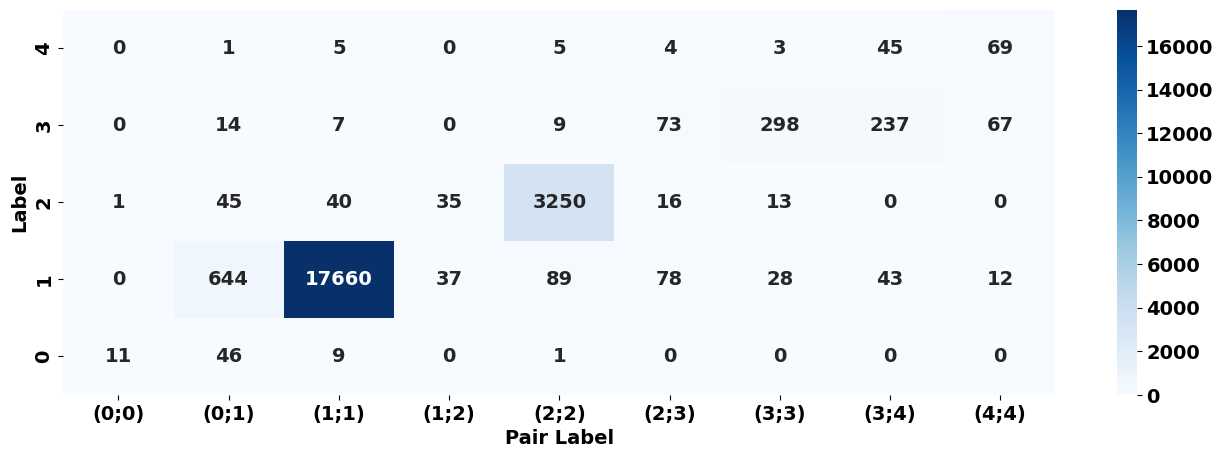

In [38]:
heat_map(data)

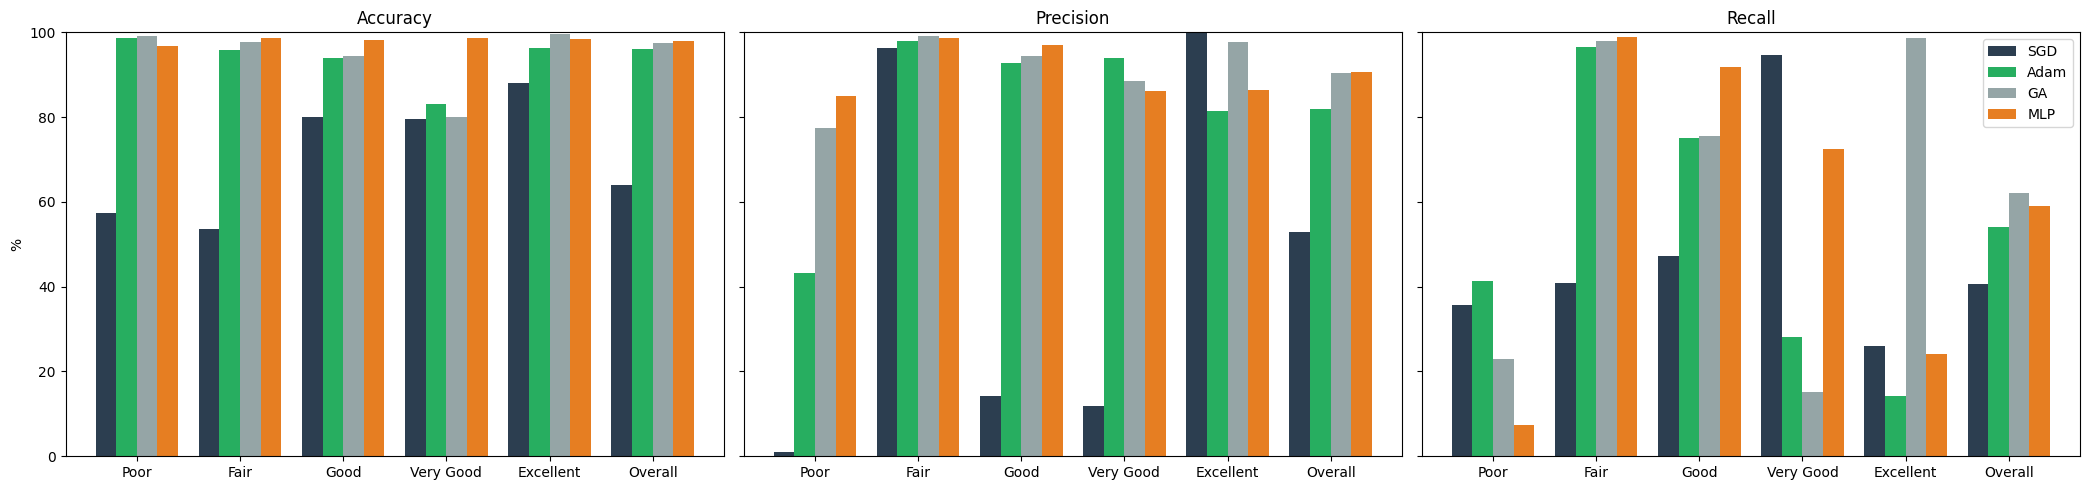

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Tạo dữ liệu giả lập (5 labels, 4 models, 3 metrics)
labels = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent', 'Overall']
models = ['SGD', 'Adam', 'GA', 'MLP']
metrics = ['Accuracy', 'Precision', 'Recall']

# Mỗi model sẽ có dữ liệu cho từng nhãn ở 3 độ đo
data = {
    'SGD': {
        'Accuracy': np.array([57.30, 53.67 , 80.00, 79.50, 88.00, 64.03]),
        'Precision': np.array([0.95, 96.20, 14.30, 11.90, 100.00, 53.00]),
        'Recall': np.array([35.75, 40.90, 47.16, 94.60, 26.00, 40.60])
    },
    'Adam': {
        'Accuracy': np.array([98.73, 95.93, 93.94, 83.03, 96.20, 96.10]),
        'Precision': np.array([43.27, 97.99, 92.72,93.85,81.36,81.83]),
        'Recall': np.array([41.34,96.65,75.1,28.23,14.14,54.10])
    },
    'GA': {
        'Accuracy': np.array([99.05,97.65,94.43,79.97,99.57,97.50]),
        'Precision': np.array([77.36,99.05,94.50,88.62,97.78,90.30]),
        'Recall': np.array([22.90,97.86,75.54,15.05,98.67,62.00])
    },
    'MLP': {
        'Accuracy': np.array([96.88,98.66,98.27,98.57,98.35,97.93]),
        'Precision': np.array([85.07,98.66,97.09,86.24,86.36,90.68]),
        'Recall': np.array([7.4,98.91,91.77,72.55,24.10,58.96])
    }
}

# Sử dụng bảng màu lạnh: xanh dương (Blues) và xanh lá (Greens)
colors = sns.color_palette(["#2C3E50", "#27AE60", "#95A5A6", "#E67E22"])  # Chọn các màu lạnh

# Thiết lập kích thước biểu đồ
fig, axs = plt.subplots(1, 3, figsize=(21, 5), sharey=True)

# Đặt các giá trị trục x cho các nhãn
x = np.arange(len(labels))  

# Độ rộng của mỗi cột trên biểu đồ
bar_width = 0.2  

# Tạo các biểu đồ con cho Accuracy, Precision và Recall
for i, metric in enumerate(metrics):
    ax = axs[i]
    
    # Vẽ các cột của từng model với màu lạnh
    for j, model in enumerate(models):
        ax.bar(x + j * bar_width, data[model][metric], bar_width, label=model, color=colors[j])
    
    # Đặt nhãn trục x
    ax.set_xticks(x + bar_width * 1.5)
    ax.set_xticklabels(labels)
    
    # Đặt tiêu đề cho từng biểu đồ
    ax.set_title(metric)
    
    # Đặt trục y
    ax.set_ylim(0, 100)
    
    # Đặt nhãn trục y
    if not i:
        ax.set_ylabel('%')
    
    # Hiển thị legend
plt.legend()
# Hiển thị biểu đồ
plt.savefig('model_comparison.png', format='png',bbox_inches='tight', dpi=300)
plt.tight_layout()
plt.show()


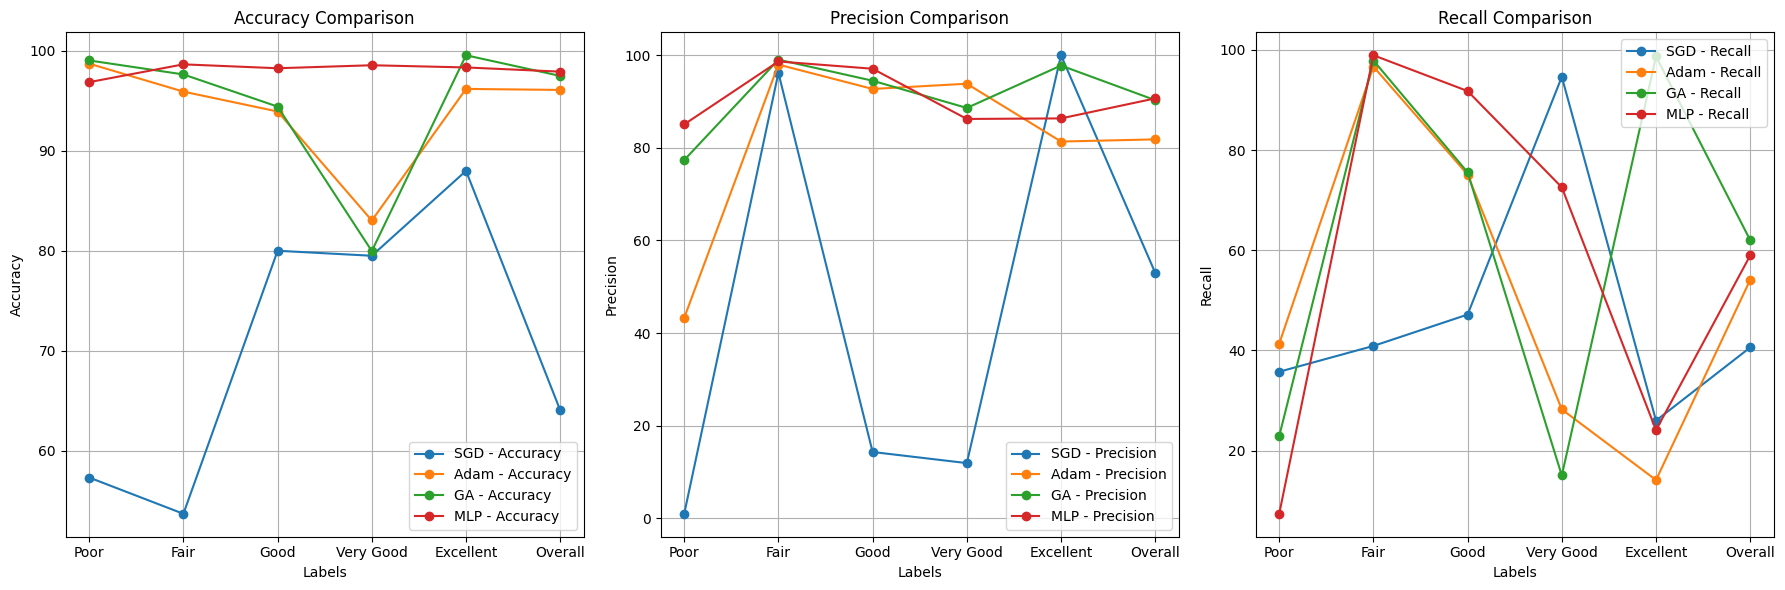

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Dữ liệu mẫu: Accuracy, Precision, Recall cho từng nhãn và model
labels = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent', 'Overall']
accuracy_sgd = [57.30, 53.67 , 80.00, 79.50, 88.00, 64.03]
precision_sgd = [0.95, 96.20, 14.30, 11.90, 100.00, 53.00]
recall_sgd = [35.75, 40.90, 47.16, 94.60, 26.00, 40.60]

accuracy_adam = [98.73, 95.93, 93.94, 83.03, 96.20, 96.10]
precision_adam = [43.27, 97.99, 92.72,93.85,81.36,81.83]
recall_adam = [41.34,96.65,75.1,28.23,14.14,54.10]

accuracy_ga = [99.05,97.65,94.43,79.97,99.57,97.50]
precision_ga = [77.36,99.05,94.50,88.62,97.78,90.30]
recall_ga = [22.90,97.86,75.54,15.05,98.67,62.00]

accuracy_mlp = [96.88,98.66,98.27,98.57,98.35,97.93]
precision_mlp = [85.07,98.66,97.09,86.24,86.36,90.68]
recall_mlp = [7.4,98.91,91.77,72.55,24.10,58.96]

# Tạo figure và các subplots nằm ngang (1 hàng, 3 cột)
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Biểu đồ cho Accuracy
axs[0].plot(labels, accuracy_sgd, marker='o', label='SGD - Accuracy')
axs[0].plot(labels, accuracy_adam, marker='o', label='Adam - Accuracy')
axs[0].plot(labels, accuracy_ga, marker='o', label='GA - Accuracy')
axs[0].plot(labels, accuracy_mlp, marker='o', label='MLP - Accuracy')
axs[0].set_title('Accuracy Comparison')
axs[0].set_xlabel('Labels')
axs[0].set_ylabel('Accuracy')
axs[0].legend()
axs[0].grid(True)

# Biểu đồ cho Precision
axs[1].plot(labels, precision_sgd, marker='o', label='SGD - Precision')
axs[1].plot(labels, precision_adam, marker='o', label='Adam - Precision')
axs[1].plot(labels, precision_ga, marker='o', label='GA - Precision')
axs[1].plot(labels, precision_mlp, marker='o', label='MLP - Precision')
axs[1].set_title('Precision Comparison')
axs[1].set_xlabel('Labels')
axs[1].set_ylabel('Precision')
axs[1].legend()
axs[1].grid(True)

# Biểu đồ cho Recall
axs[2].plot(labels, recall_sgd, marker='o', label='SGD - Recall')
axs[2].plot(labels, recall_adam, marker='o', label='Adam - Recall')
axs[2].plot(labels, recall_ga, marker='o', label='GA - Recall')
axs[2].plot(labels, recall_mlp, marker='o', label='MLP - Recall')
axs[2].set_title('Recall Comparison')
axs[2].set_xlabel('Labels')
axs[2].set_ylabel('Recall')
axs[2].legend()
axs[2].grid(True)

# Tự động điều chỉnh layout để không bị chồng chéo
plt.tight_layout()
plt.show()


In [ ]:
data = {
    "(0;0)":{"0":11,"1":0,"2":1, "3":0, "4":0},
    "(0;1)":{"0":46,"1":644,"2":45, "3":14, "4":1},
    "(1;1)":{"0":9,"1":17660,"2":40, "3":7, "4":5},
    "(1;2)":{"0":0,"1":37,"2":35, "3":0, "4":0},
    "(2;2)":{"0":1,"1":89,"2":3250, "3":9, "4":5},
    "(2;3)":{"0":0,"1":78,"2":16, "3":73, "4":4},
    "(3;3)":{"0":0,"1":28,"2":13, "3":298, "4":3},
    "(3;4)":{"0":0,"1":43,"2":0, "3":237, "4":45},
    "(4;4)":{"0":0,"1":12,"2":0, "3":67, "4":69}
}